## Multi-band Raster data

In [1]:
import geopandas as gpd


import matplotlib.pyplot as plt
from matplotlib import colors

import rasterio
from rasterio.mask import mask

import numpy as np

In [2]:
reprojected_file1 = 'germany_population_reprojected.tif'
aligned_file2 = 'germany_elevation_reprojected_resampled.tif'

In [3]:
output_file = 'combined_raster.tif'

In [4]:
with rasterio.open(reprojected_file1) as src1, rasterio.open(aligned_file2) as src2:
    band1 = src1.read(1)
    band2 = src2.read(1)

    combined_data = np.stack([band1, band2], axis=0)

    combined_meta = src1.meta.copy()
    combined_meta.update(count = 2)

    with rasterio.open(output_file, 'w', **combined_meta) as dst:
        dst.write(combined_data)

In [5]:
with rasterio.open(output_file) as combined_src:
    band1 = combined_src.read(1)
    band2 = combined_src.read(2)

In [6]:
combined_src.crs

CRS.from_wkt('PROJCS["ETRS89 / UTM zone 32N",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","25832"]]')

In [7]:
combined_src.res

(745.7190107123781, 745.7190107123781)

In [8]:
combined_src.count

2

In [9]:
combined_src.width, combined_src.height

(931, 1185)

In [11]:
from rasterio.plot import show

<Axes: title={'center': 'Elevation'}>

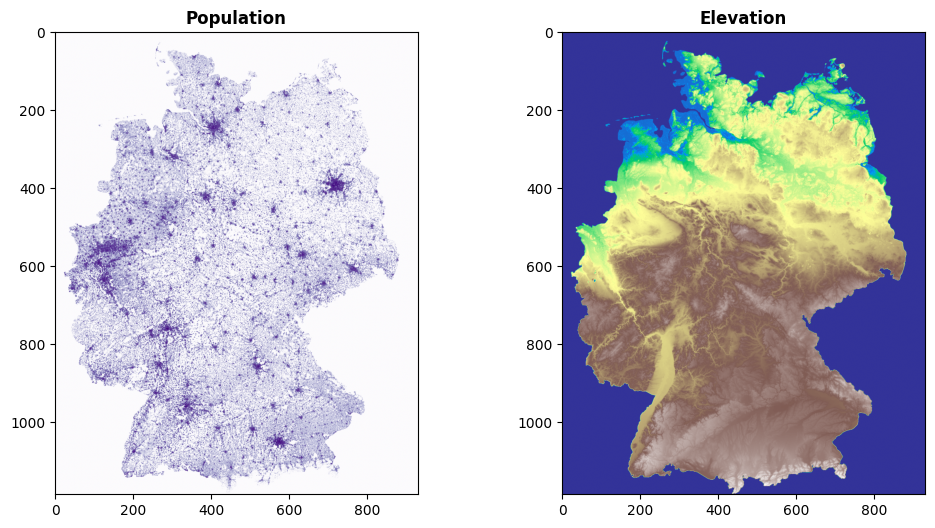

In [12]:
log_band1 = np.log1p(band1)
log_band2 = np.log1p(band2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))
show(log_band1, ax = ax1, cmap = 'Purples', title = 'Population')
show(log_band2, ax = ax2, cmap = 'terrain', title = 'Elevation')
